In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('Sciences train.csv')
test_df = pd.read_csv('Sciences test.csv')

In [3]:
print('Train DF shape:', train_df.shape)
print('Test DF shape:', test_df.shape)

Train DF shape: (8695, 3)
Test DF shape: (1586, 3)


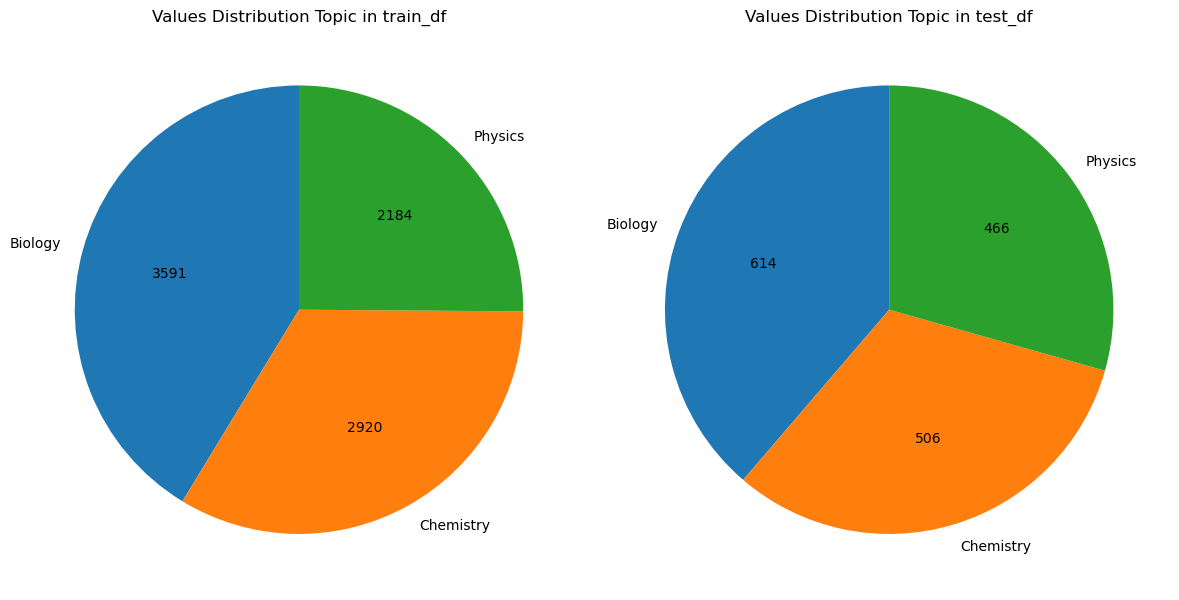

In [4]:
def plot_topic_distribution(df1, df2, column_name):
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    counts1 = df1[column_name].value_counts()
    counts1.plot.pie(ax=axes[0], autopct=lambda p: '{:.0f}'.format(p * counts1.sum() / 100), startangle=90)
    axes[0].set_ylabel('')
    axes[0].set_title(f'Values Distribution {column_name} in train_df')

    counts2 = df2[column_name].value_counts()
    counts2.plot.pie(ax=axes[1], autopct=lambda p: '{:.0f}'.format(p * counts2.sum() / 100), startangle=90)
    axes[1].set_ylabel('')
    axes[1].set_title(f'Values Distribution {column_name} in test_df')
    
    plt.tight_layout() 
    plt.show()
    
plot_topic_distribution(train_df, test_df, 'Topic')

In [5]:
def count_missings(df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.concat([missing_values, missing_percentage], axis=1)
    missing_df.columns = ['Missing Count', 'Missing %']
    missing_df_sorted = missing_df[missing_df['Missing %'] > 0.01].sort_values(by='Missing %', ascending=False)
    
    return missing_df_sorted

count_missings(train_df)

,Missing Count,Missing %


In [6]:
train_df.dropna(inplace=True)

In [7]:
train_df = train_df[['Comment', 'Topic']]
test_df = test_df[['Comment', 'Topic']]

In [8]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = text.lower()
    text = re.sub('@\S+', ' ', text)
    text = re.sub('https*\S+', ' ', text)
    text = re.sub('#\S+', ' ', text)
    text = re.sub('\d', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    text = ' '.join([word for word in words if word.isalpha()])

    return text

train_df.Comment = train_df.Comment.apply(clean_text)
test_df.Comment = test_df.Comment.apply(clean_text)

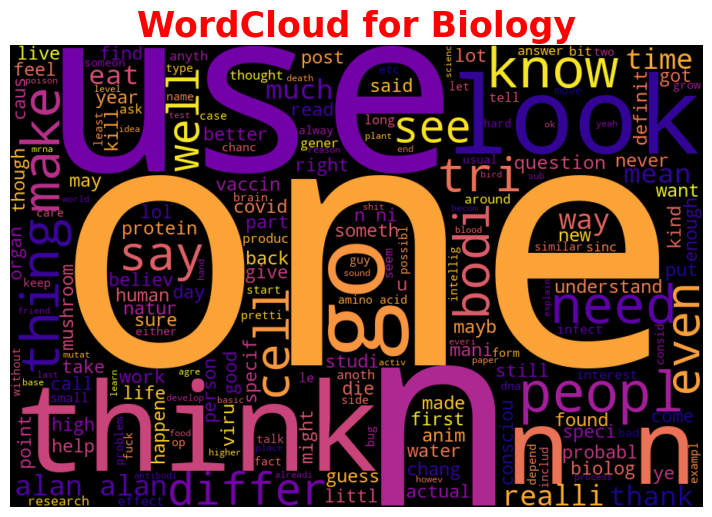

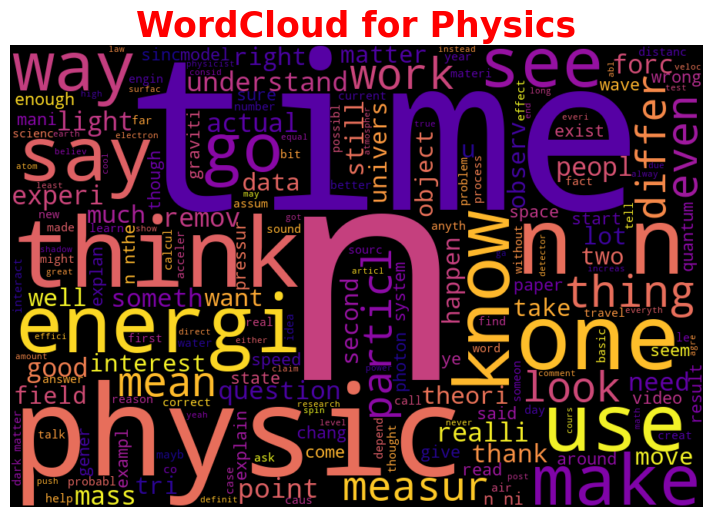

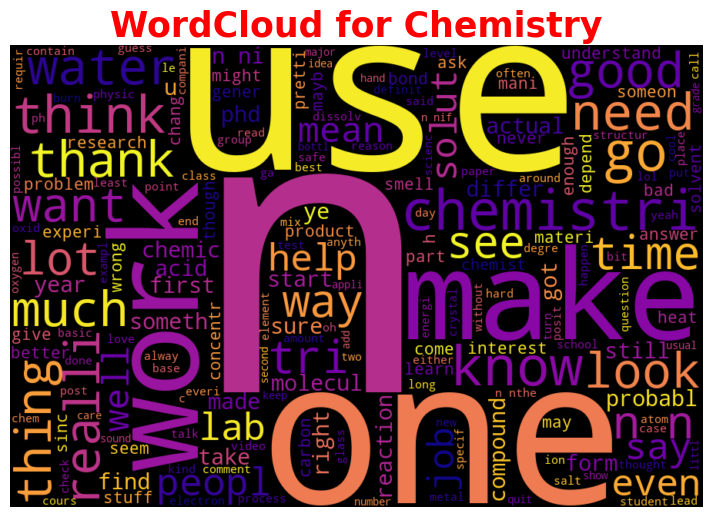

In [9]:
from wordcloud import WordCloud

def generate_wordcloud(data, category_col, text_col, category_value):
    
    category_data = data[data[category_col] == category_value]
    
    combined_text = ' '.join(category_data[text_col].str.lower())
    
    wordcloud = WordCloud(width=900, height=600, background_color='black',      
                           colormap='plasma', max_words=200, contour_color='white', contour_width=1).generate(combined_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {category_value}', fontsize=25, weight='bold', color = 'red')
    plt.axis('off')
    plt.show()


generate_wordcloud(train_df, 'Topic', 'Comment', 'Biology')
generate_wordcloud(train_df, 'Topic', 'Comment', 'Physics')
generate_wordcloud(train_df, 'Topic', 'Comment', 'Chemistry')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_df['Comment'])
X_test = vectorizer.transform(test_df['Comment'])

y_train = train_df.Topic
y_test =  test_df.Topic

accuracy score 0.8329129886506935
              precision    recall  f1-score   support

     Biology       0.84      0.84      0.84       614
   Chemistry       0.80      0.84      0.82       506
     Physics       0.86      0.82      0.84       466

    accuracy                           0.83      1586
   macro avg       0.83      0.83      0.83      1586
weighted avg       0.83      0.83      0.83      1586



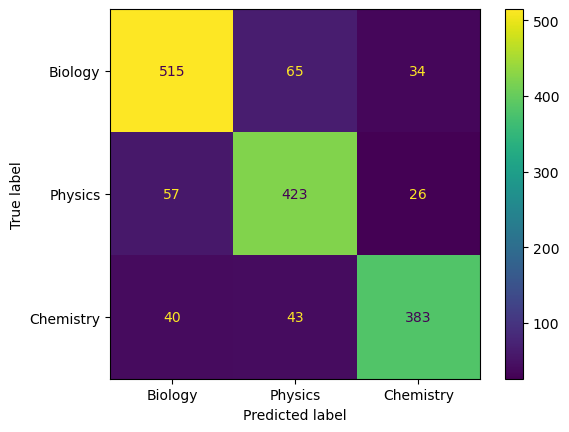

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

classifier = LogisticRegression(max_iter=100).fit(X_train,y_train)

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print('accuracy score', accuracy_score(y_test, y_pred))
print(report)
cm = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Biology','Physics','Chemistry'])
cm_display.plot()

accuracy score 0.8461538461538461
              precision    recall  f1-score   support

     Biology       0.89      0.84      0.86       614
   Chemistry       0.79      0.85      0.82       506
     Physics       0.86      0.85      0.86       466

    accuracy                           0.85      1586
   macro avg       0.85      0.85      0.85      1586
weighted avg       0.85      0.85      0.85      1586



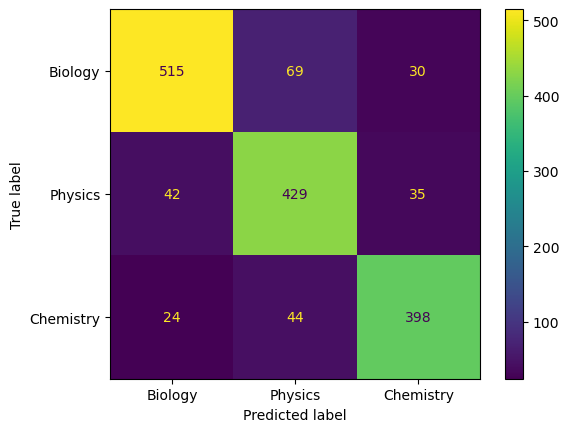

In [14]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1).fit(X_train, y_train)

y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print('accuracy score', accuracy_score(y_test, y_pred))
print(report)
cm = confusion_matrix(y_test, y_pred)
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Biology','Physics','Chemistry'])
cm_display.plot()